In [1]:
import model_loader
from PIL import Image
from transformers import CLIPTokenizer
import torch
from Deep_Learning.Diffusion.StableDiffusionFromScratch.pipeline import generate

c:\Users\joeag\Documents\venvs\ml-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device cuda


c:\Users\joeag\Documents\venvs\ml-env\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
100%|██████████| 50/50 [00:05<00:00,  8.87it/s]


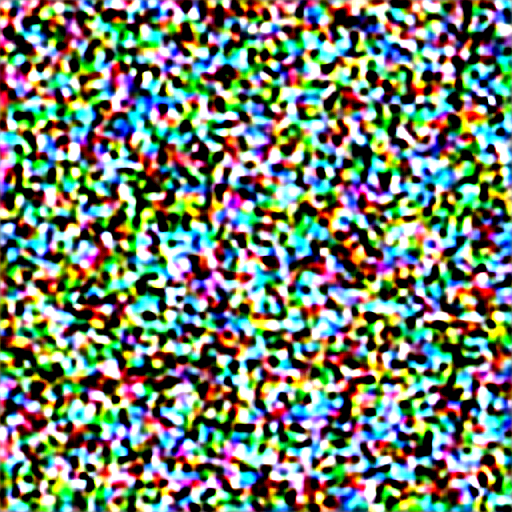

In [2]:
DEVICE = "cpu"

ALLOW_CUDA = True
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
# elif (torch.has_mps or torch.backend.mps.is_available()) and ALLOW_MPS:
#     DEVICE = "mps"
print(f"Using device {DEVICE}")

tokenizer = CLIPTokenizer("Deep_Learning/Diffusion/StableDiffusionFromScratch/data/tokenizer_vocab.json", merges_file="Deep_Learning/Diffusion/StableDiffusionFromScratch/data/tokenizer_merges.txt")
model_file = "Deep_Learning/Diffusion/StableDiffusionFromScratch/data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)


## Text to Image
# prompt = "A cat stretching on the floor, highly detailed, ultra sharp, cinematic, 8k resolution"
prompt = "cat"
uncond_prompt = "sofa"
do_cfg = True
cfg_scale = 7

## Image to Image
input_image = None
# image_path = "Deep_Learning/Diffusion/StableDiffusionFromScratch/data/Kitten.jpg"
# input_image = Image.open(image_path)
strength = 0.9

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

Image.fromarray(output_image)
